In [1]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
#get data and filtere it 
frame = pd.read_csv(r'weekcount.csv')
df = pd.DataFrame(frame)
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'

In [3]:
copy = df.copy()

In [4]:
copy["year"]  = copy["year"] +1

In [5]:
copy["guetemass"] = copy["anzahl"] *1.1

In [6]:
copy = copy.drop("anzahl",axis=1)

In [7]:
gutemass = pd.merge(df,copy,on=['year','week','station'],how='outer')

In [8]:
gutemass = gutemass.dropna(subset=['anzahl'])

In [9]:
gutemass

,year,week,station,anzahl,guetemass
0,2015,39,5 Corners Library,43.0,NaN
1,2015,39,Baldwin at Montgomery,66.0,NaN
2,2015,39,Bayside Park,16.0,NaN
3,2015,39,Brunswick St,186.0,NaN
4,2015,39,Central Ave,25.0,NaN
...,...,...,...,...,...
10464,2019,52,Union St,10.0,18.7
10465,2019,52,Van Vorst Park,82.0,85.8
10466,2019,52,Warren St,126.0,70.4
10467,2019,52,Washington St,101.0,67.1


In [10]:
x = gutemass.drop(["anzahl","guetemass"] ,axis=1) 
y = gutemass["anzahl"]
gute= gutemass["guetemass"].fillna(0)

In [11]:
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=False)

In [12]:
x_train

,year,week,station
0,2015,39,5 Corners Library
1,2015,39,Baldwin at Montgomery
2,2015,39,Bayside Park
3,2015,39,Brunswick St
4,2015,39,Central Ave
...,...,...,...
8370,2019,11,Monmouth and 6th
8371,2019,11,Montgomery St
8372,2019,11,Morris Canal
8373,2019,11,Newark Ave


In [13]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y.iloc[-y_test.shape[0]:]  , gute.iloc[-y_test.shape[0]:] )

35.81833810888252

In [14]:
stationnamesframe =   df.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station'])['station'].to_numpy().tolist()
print(stationnames)

['5 Corners Library', 'Baldwin at Montgomery', 'Bayside Park', 'Brunswick St', 'Central Ave', 'Christ Hospital', 'City Hall', 'Columbia Park', 'Dey St', 'Essex Light Rail', 'Exchange Place', 'Garfield Ave Station', 'Grove St PATH', 'Hamilton Park', 'Heights Elevator', 'Hilltop', 'JC Medical Center', 'Liberty Light Rail', 'Lincoln Park', 'MLK Light Rail', 'McGinley Square', 'NJCU', 'Newark Ave', 'Newport PATH', 'Newport Pkwy', 'North St', 'Oakland Ave', 'Paulus Hook', 'Pershing Field', 'Riverview Park', 'Sip Ave', 'Union St', 'Van Vorst Park', 'Warren St', 'West Side Light Rail', 'Jersey & 3rd', 'Jersey & 6th St', 'Lafayette Park', 'Morris Canal', 'Bethune Center', 'Columbus Drive', 'Danforth Light Rail', 'Dixon Mills', 'Leonard Gordon Park', 'Manila & 1st', 'Marin Light Rail', 'Monmouth and 6th', 'Astor Place', 'Brunswick & 6th', 'JCBS Depot', 'Communipaw & Berry Lane', 'York St', 'Harborside', 'Journal Square', 'Washington St', 'Bergen Ave', 'Fairmount Ave', 'Glenwood Ave', 'Grand St'

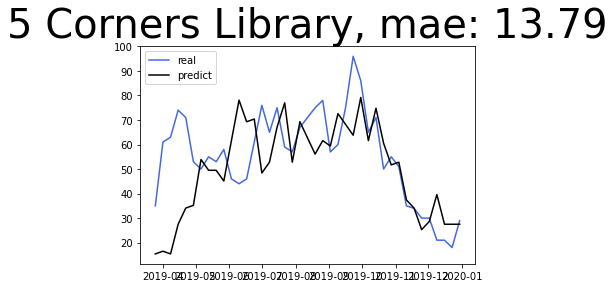

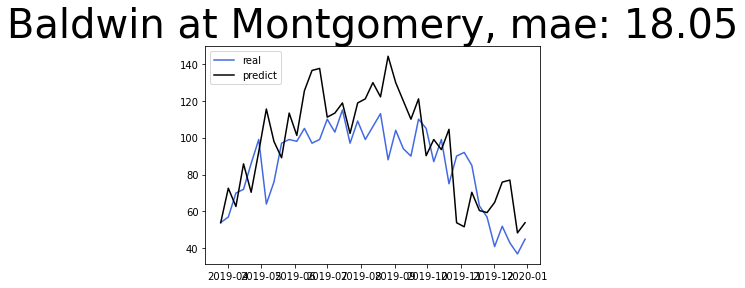

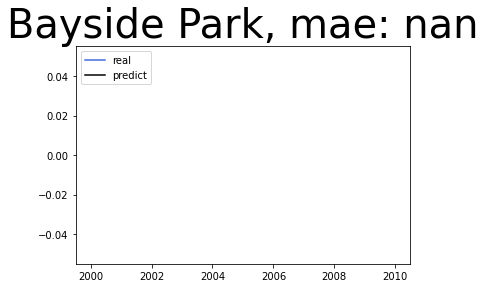

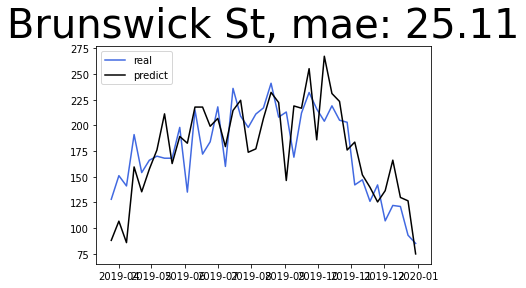

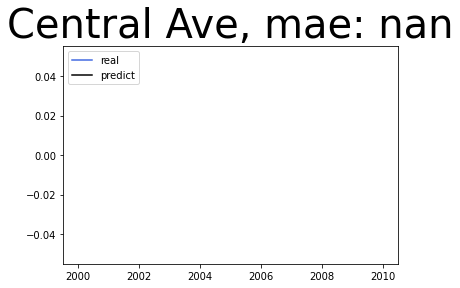

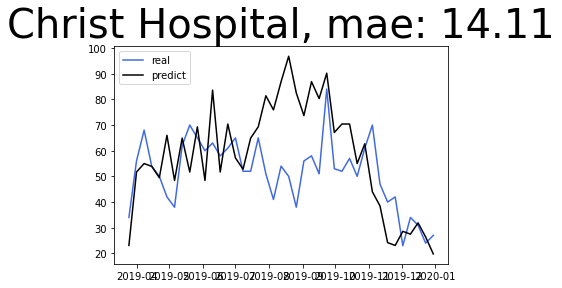

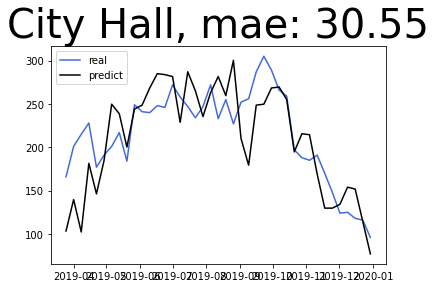

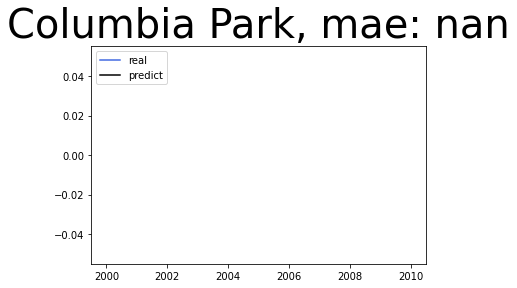

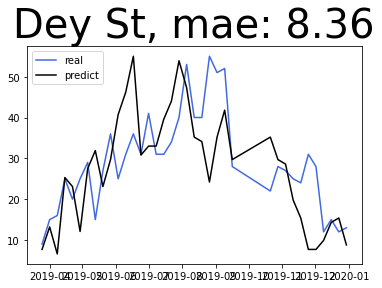

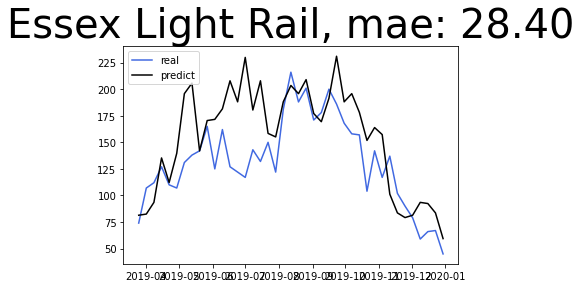

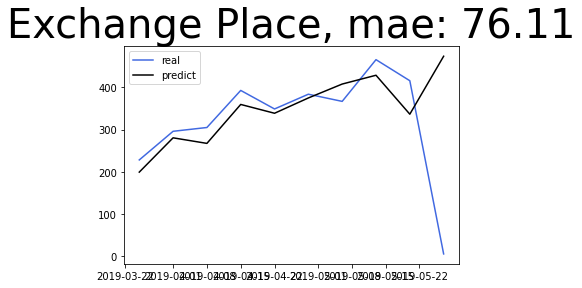

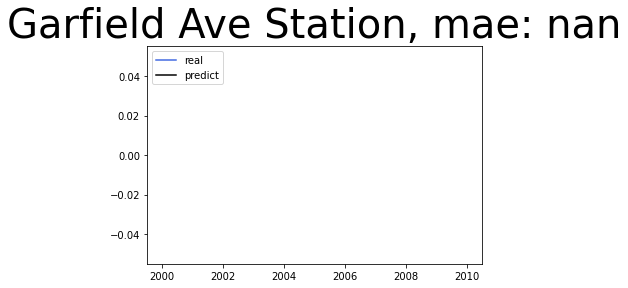

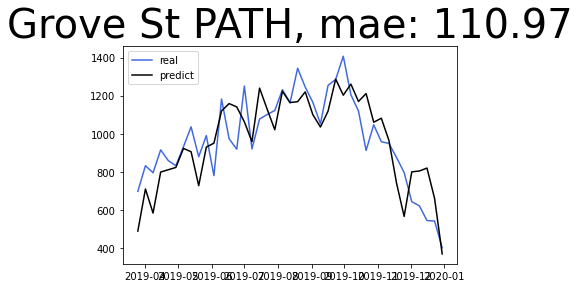

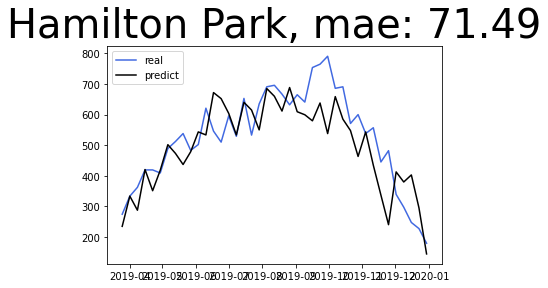

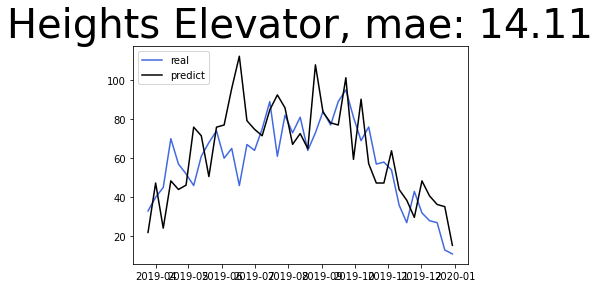

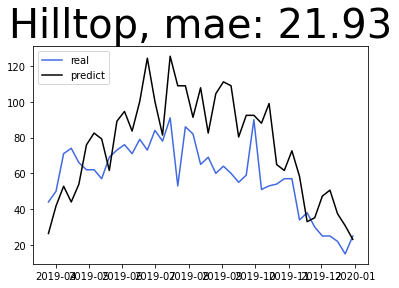

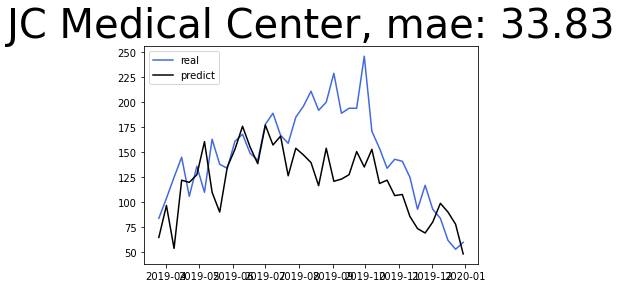

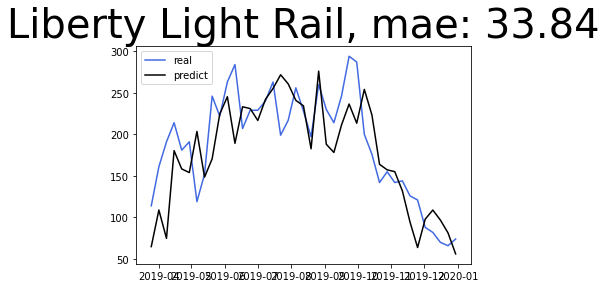

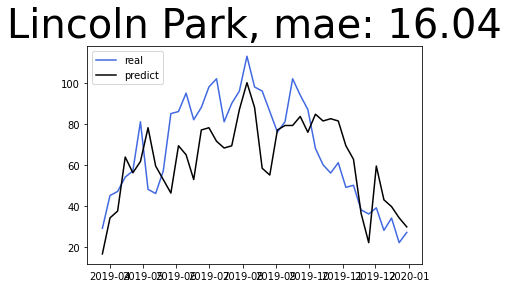

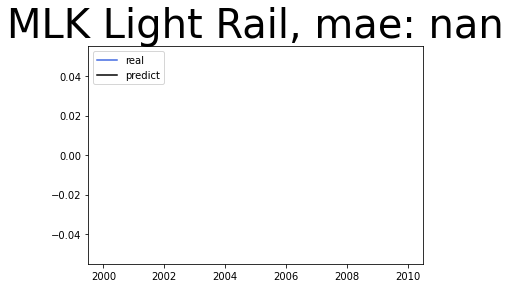

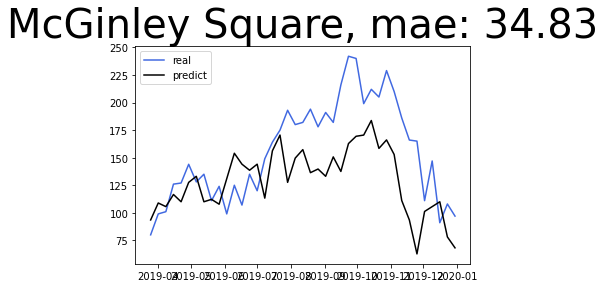

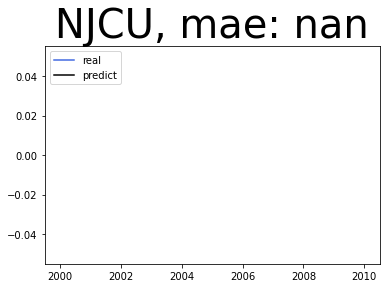

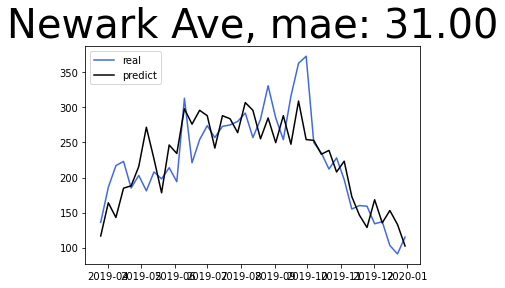

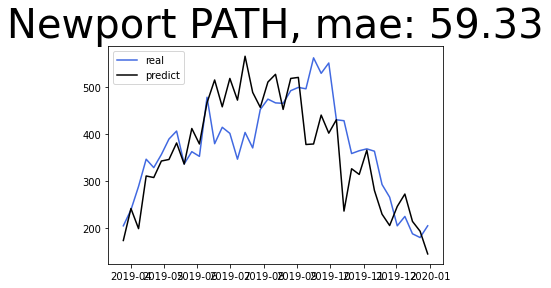

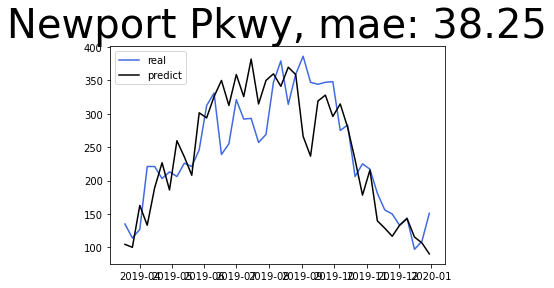

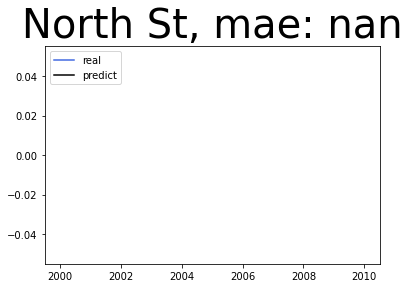

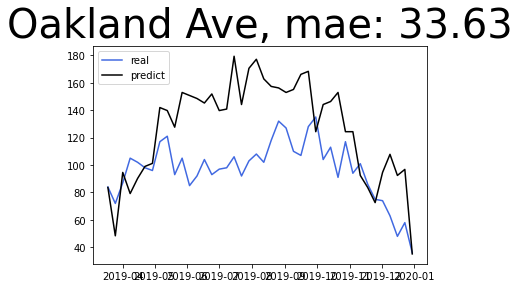

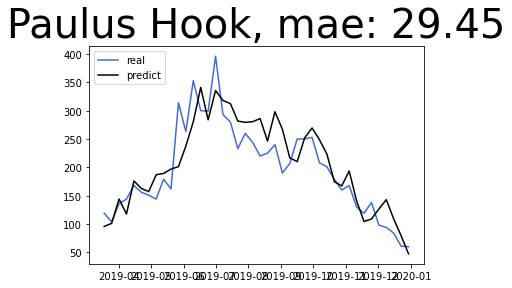

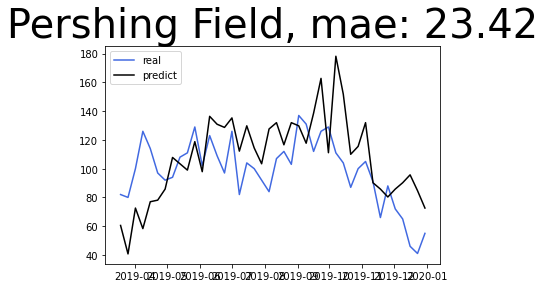

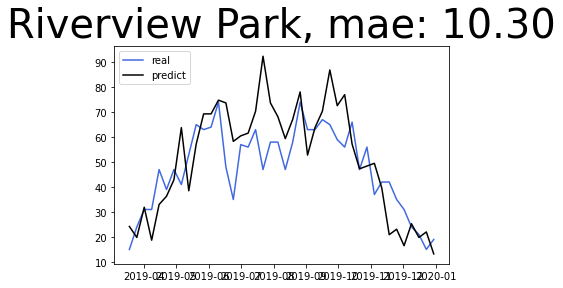

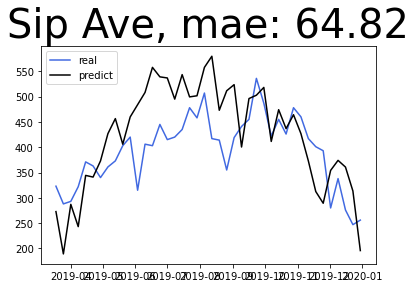

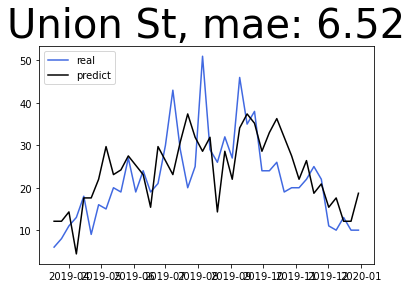

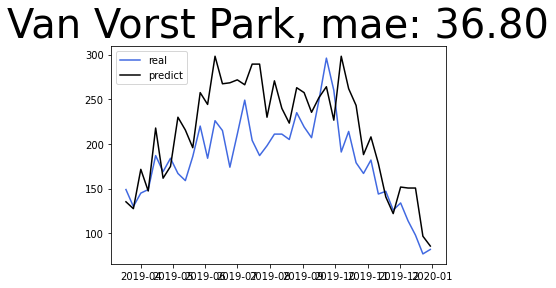

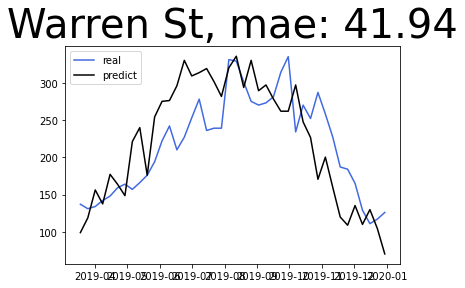

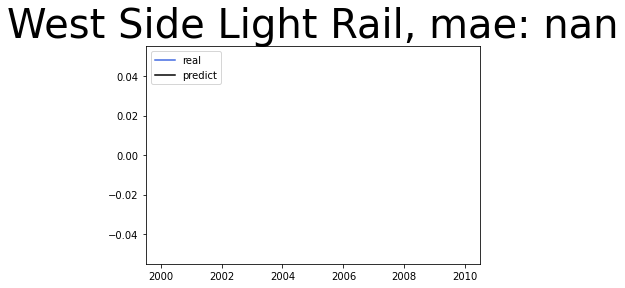

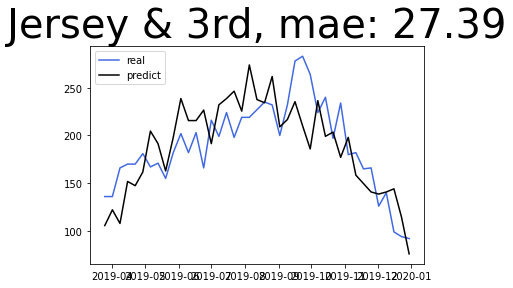

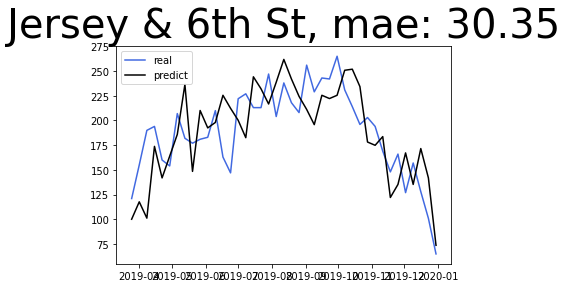

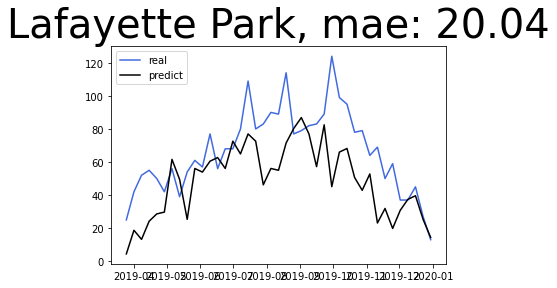

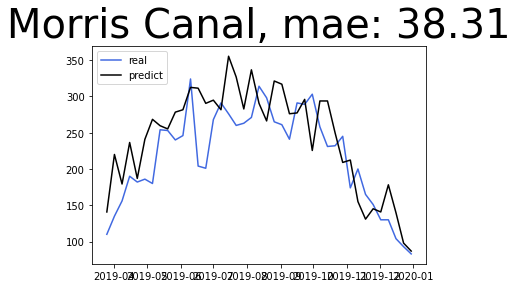

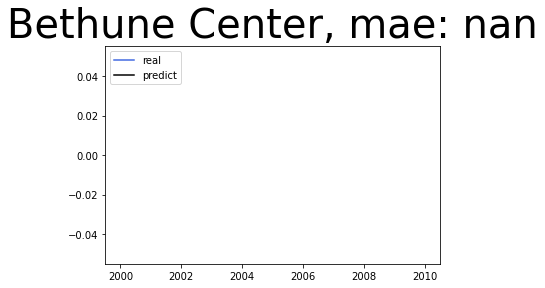

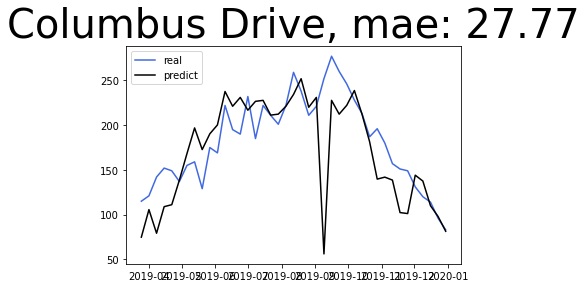

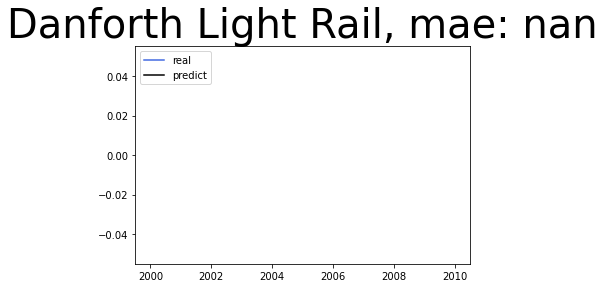

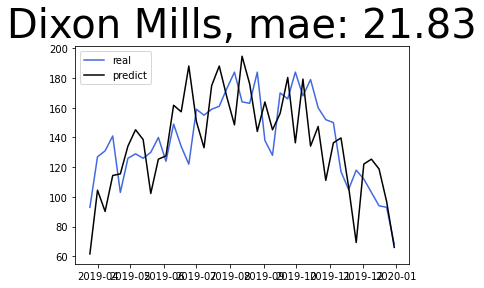

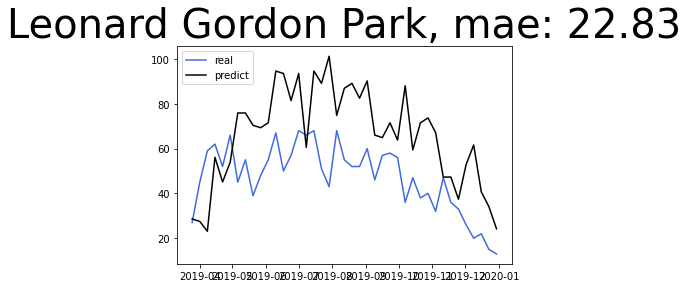

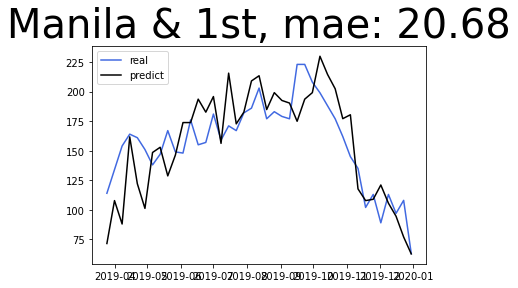

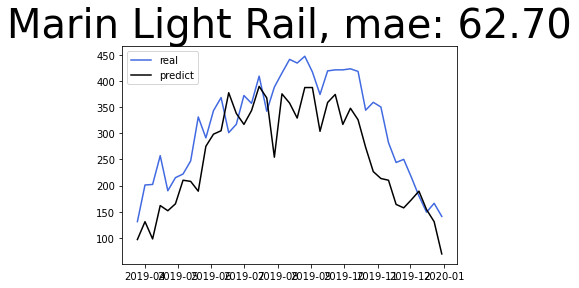

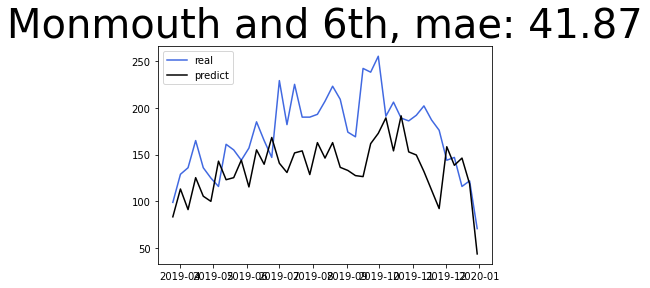

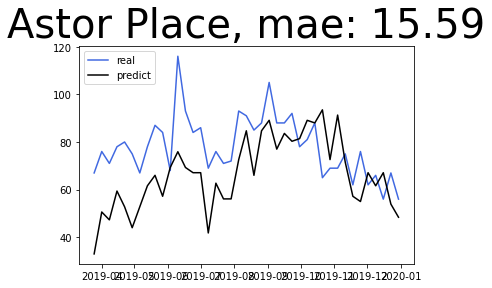

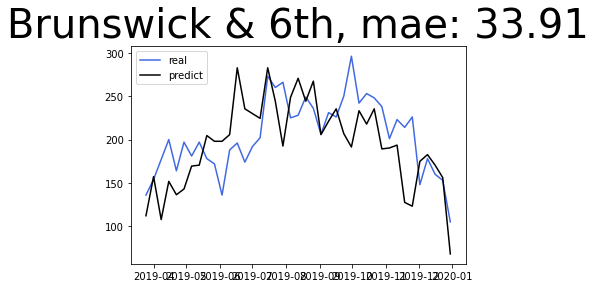

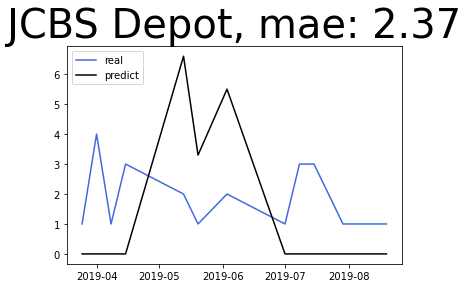

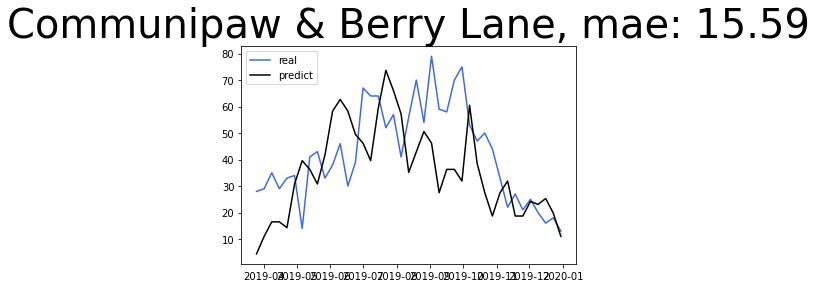

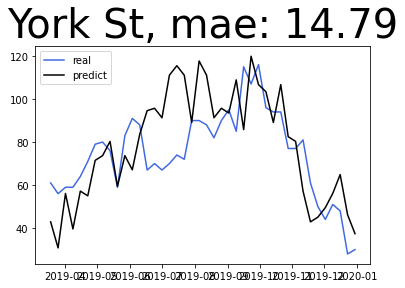

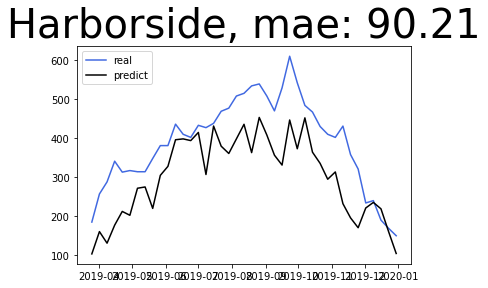

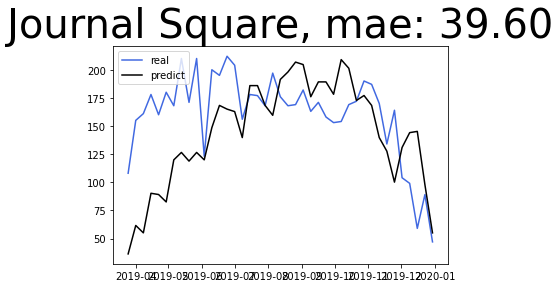

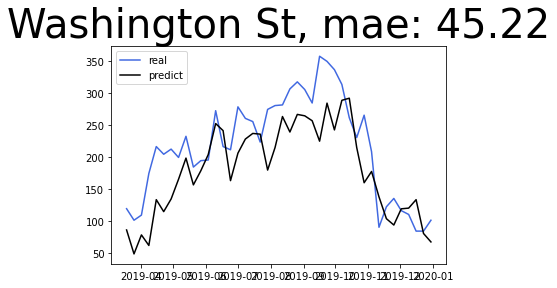

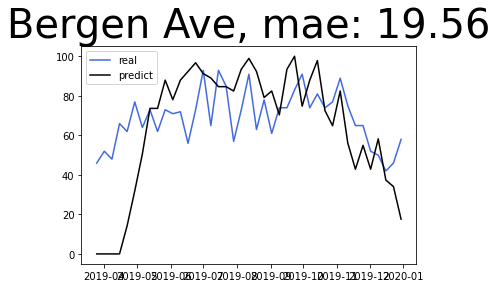

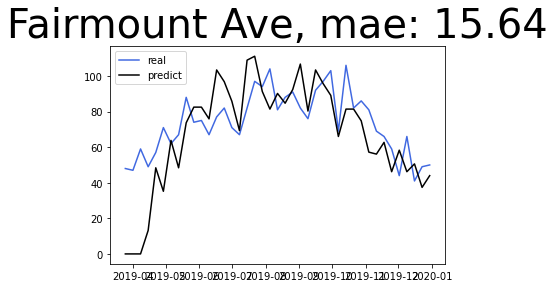

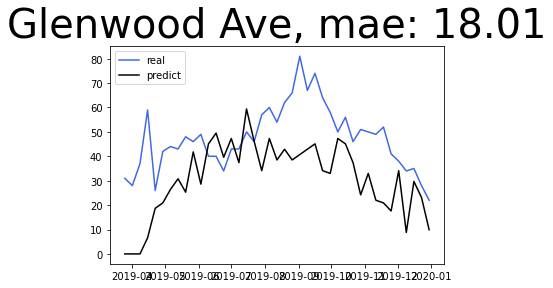

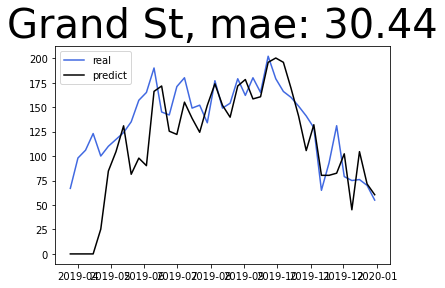

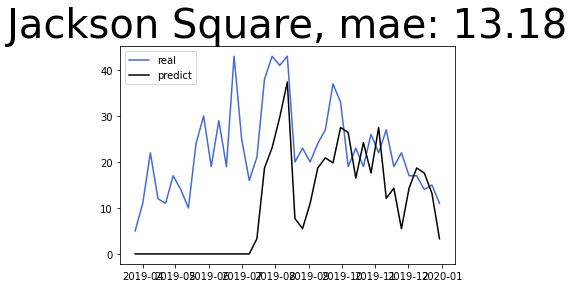

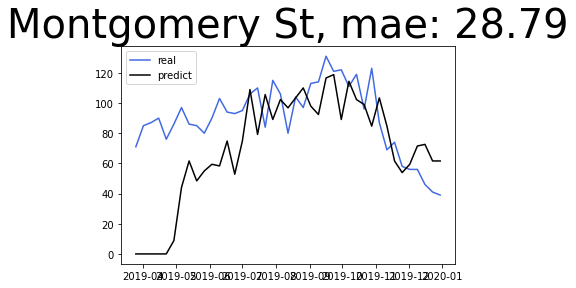

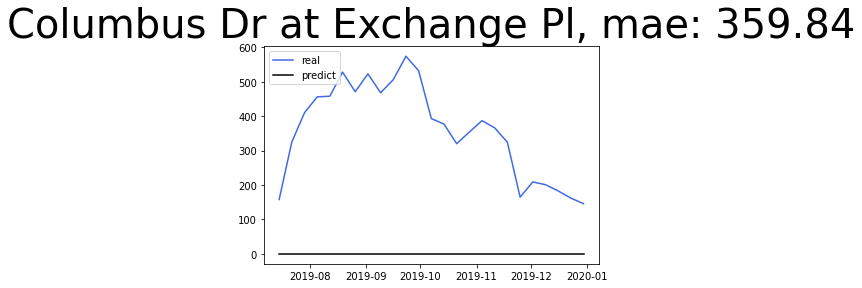

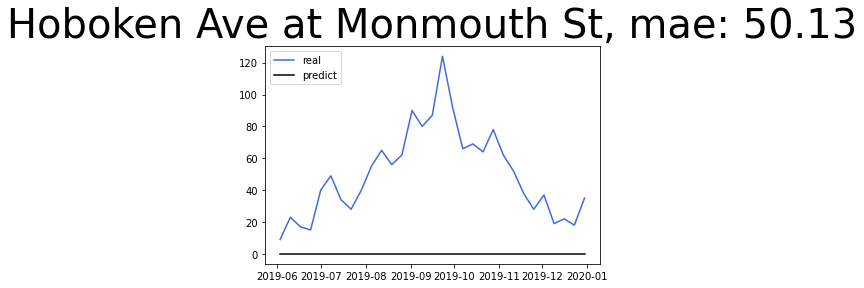

In [21]:
#show result data linear

for station in stationnames:
  
    
 
    predict_test = gute.iloc[-y_test.shape[0]:]
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = x_test
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test2)
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    plt.plot(test2['yearweek'],test2['y'],label='real' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    plt.savefig( 'GuteImages/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()
 

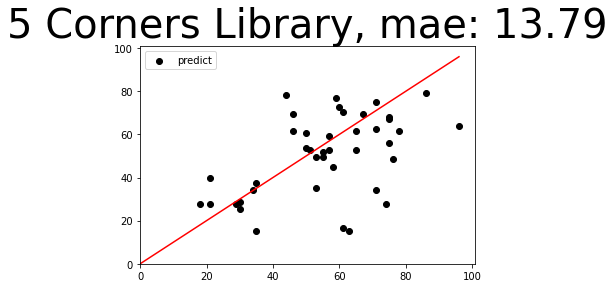

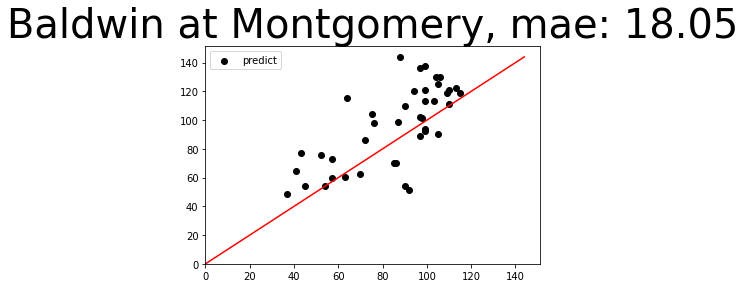

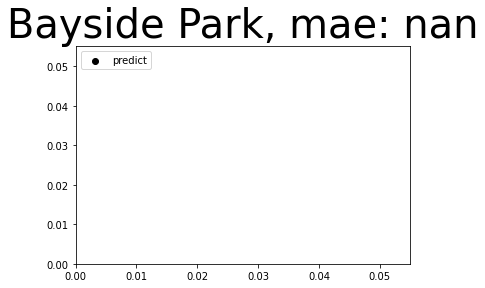

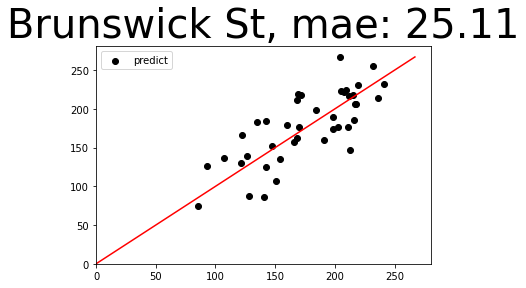

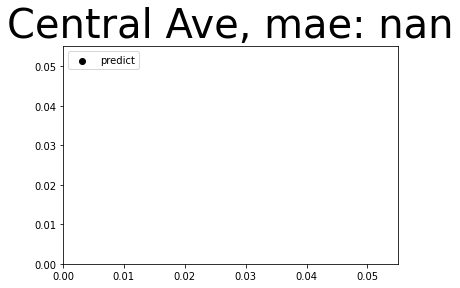

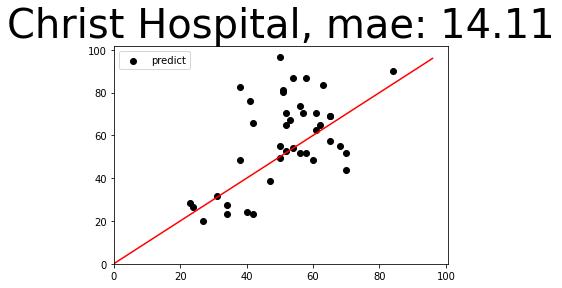

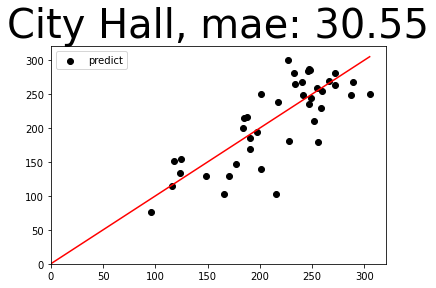

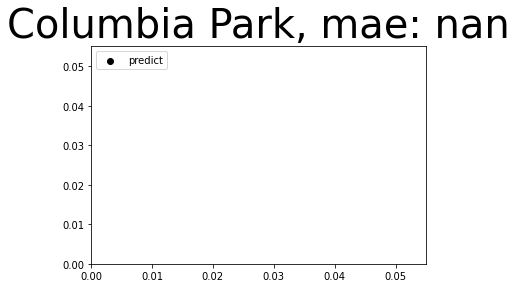

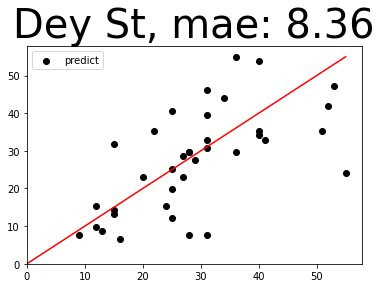

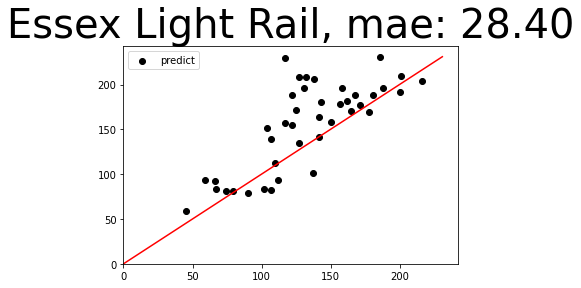

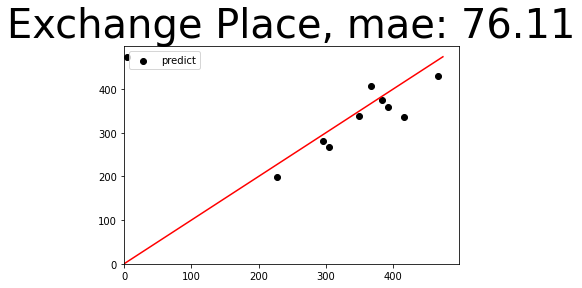

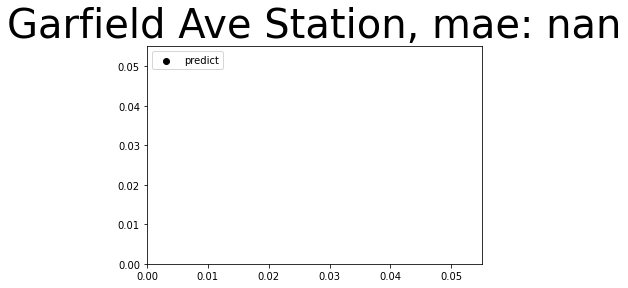

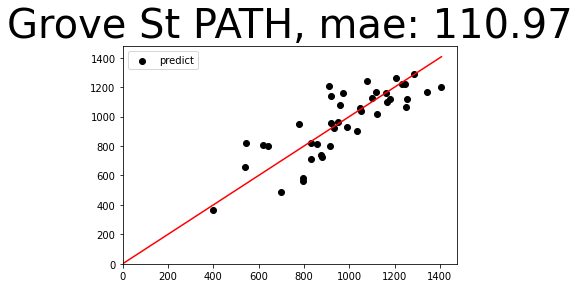

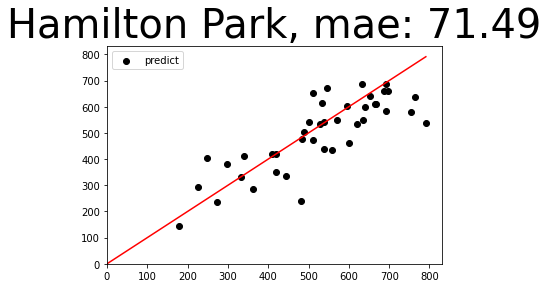

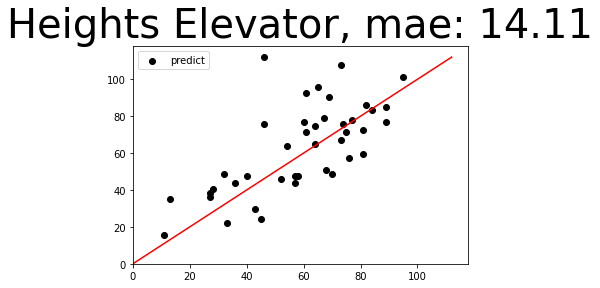

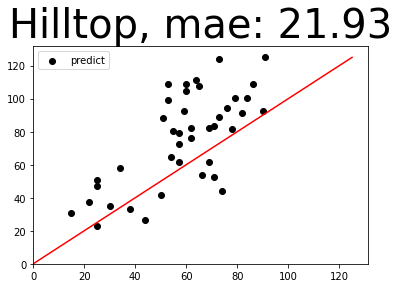

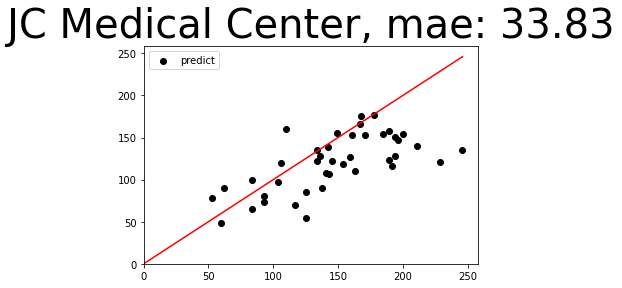

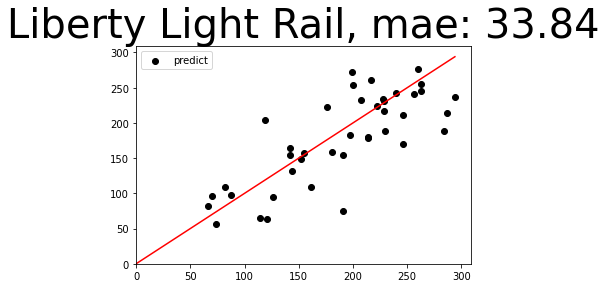

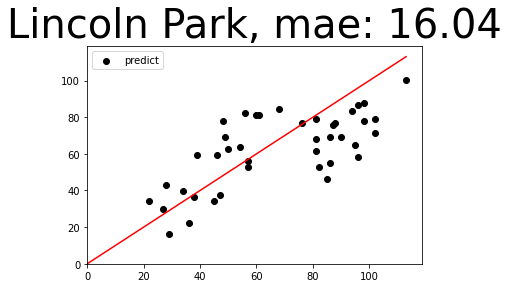

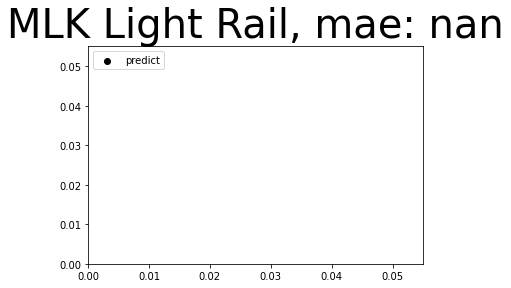

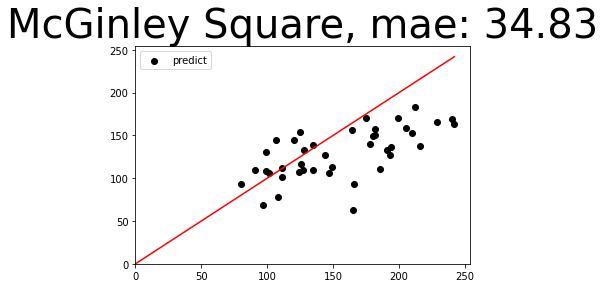

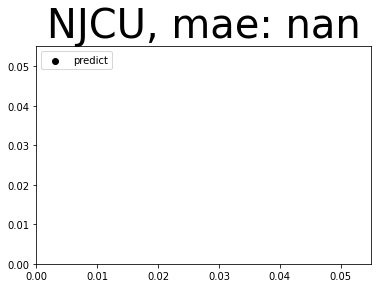

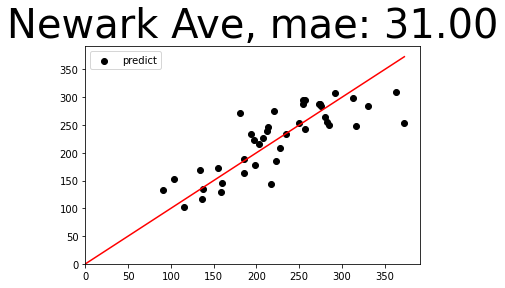

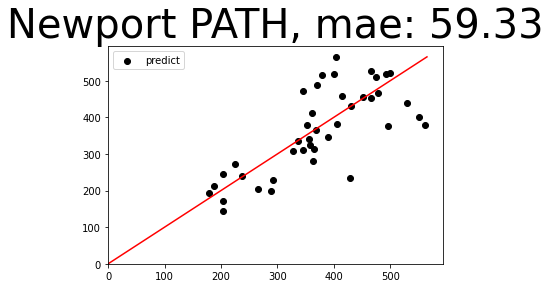

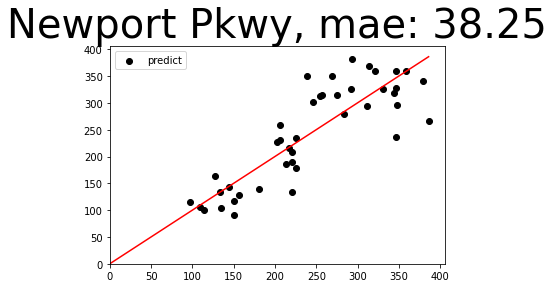

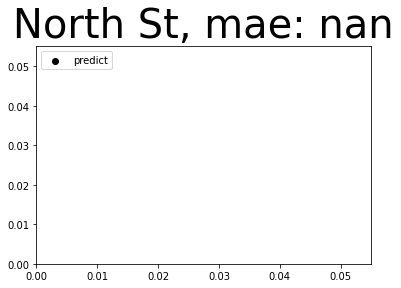

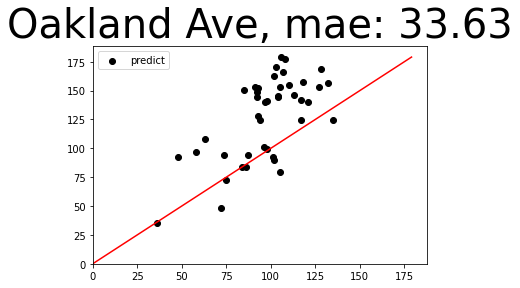

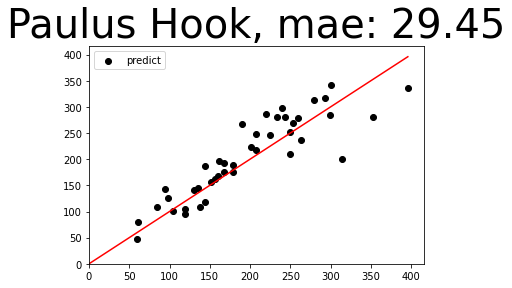

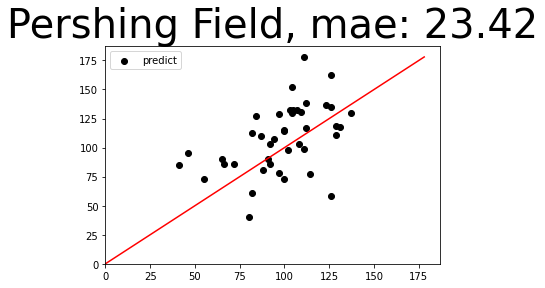

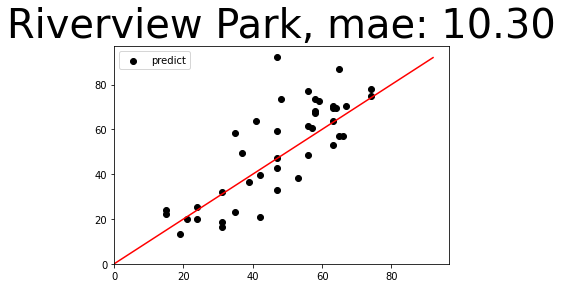

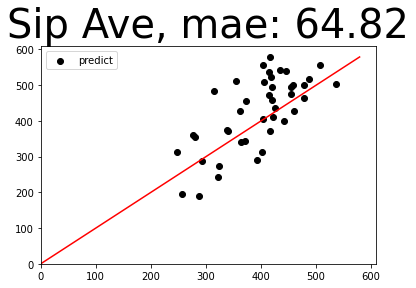

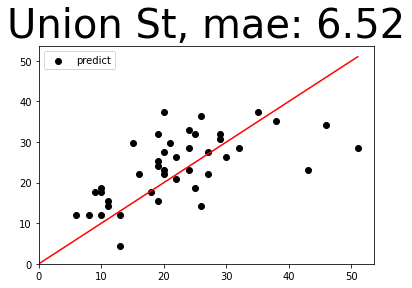

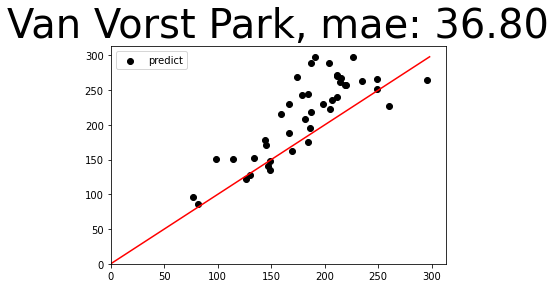

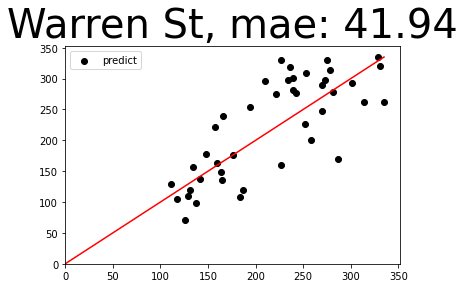

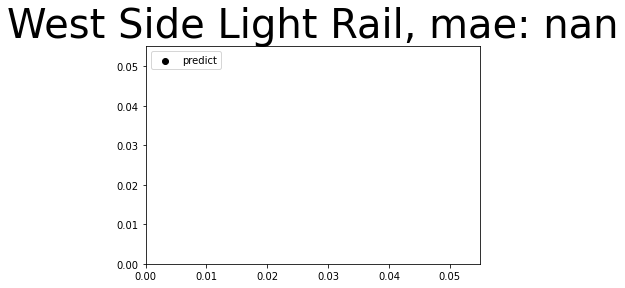

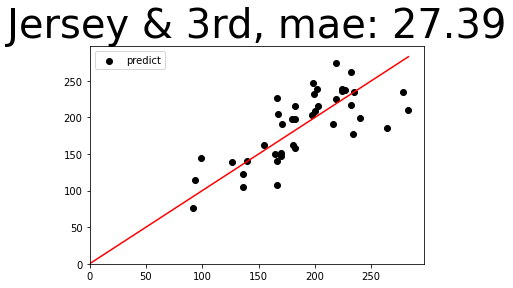

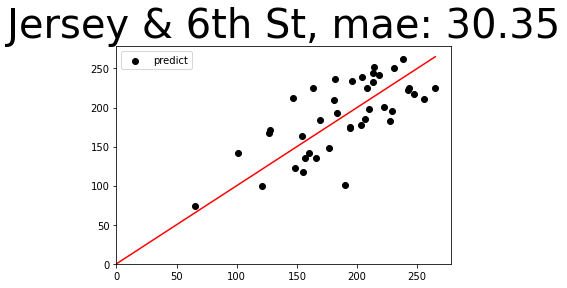

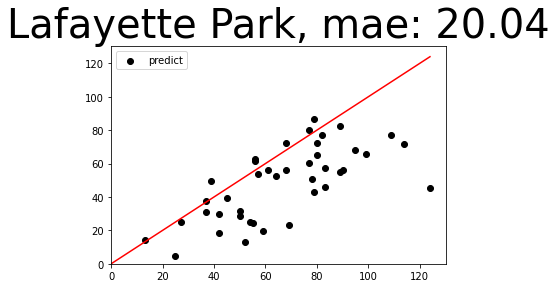

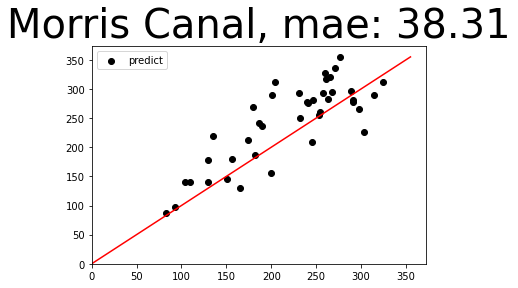

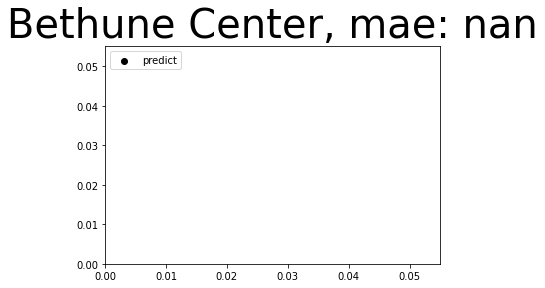

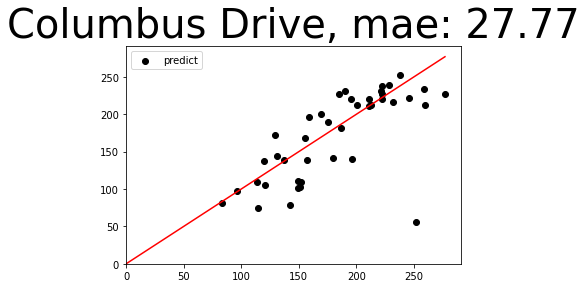

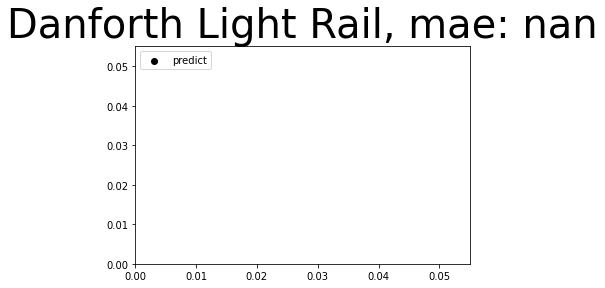

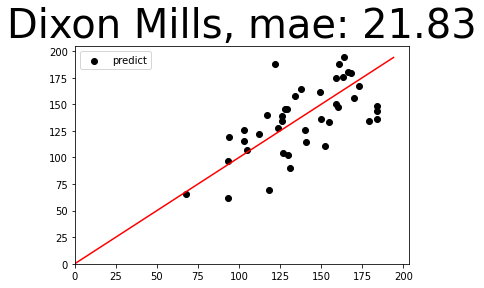

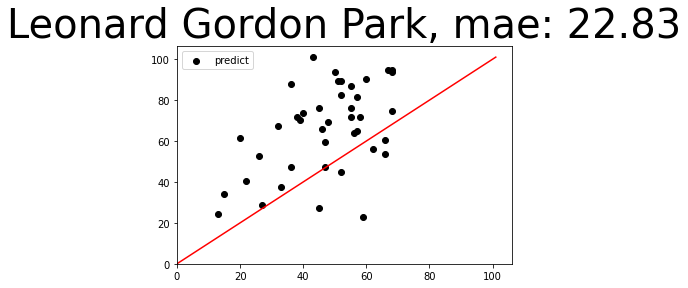

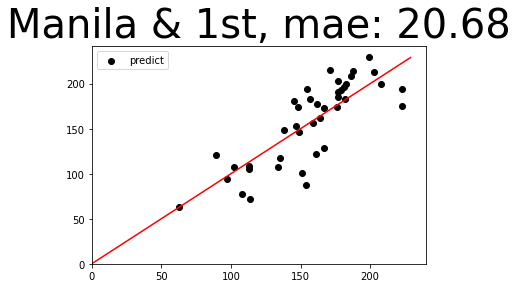

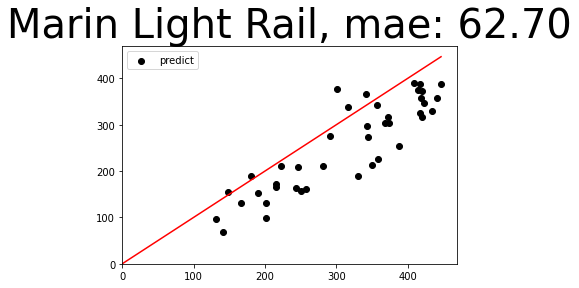

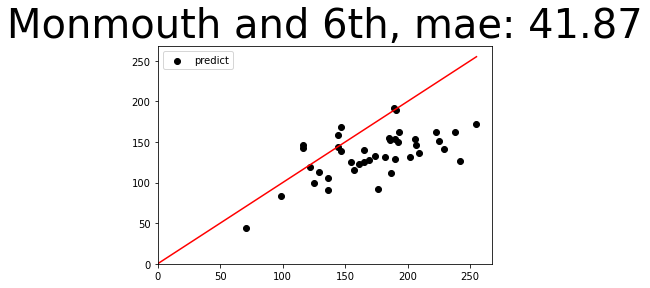

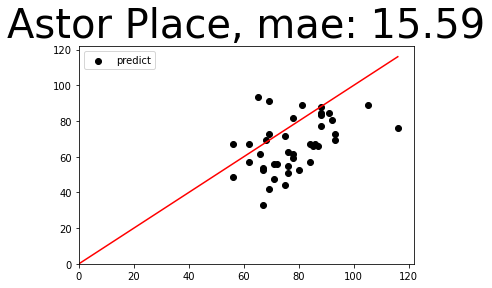

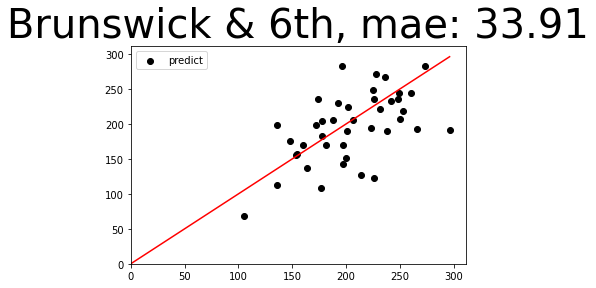

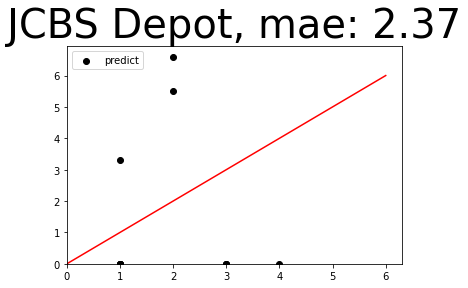

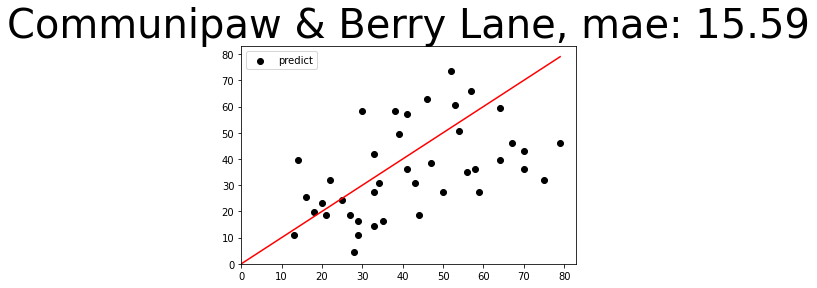

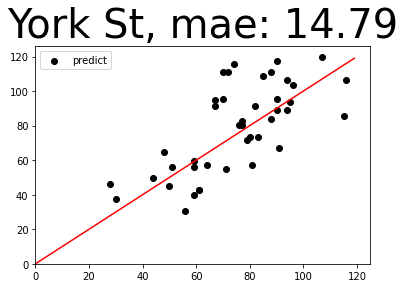

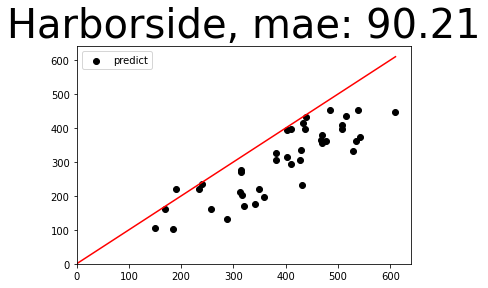

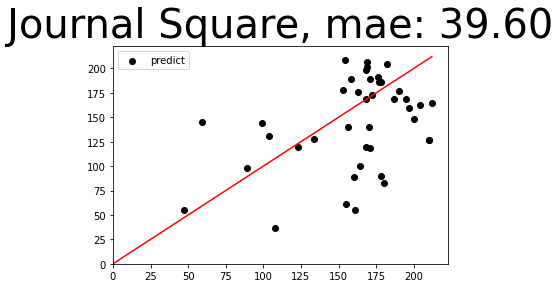

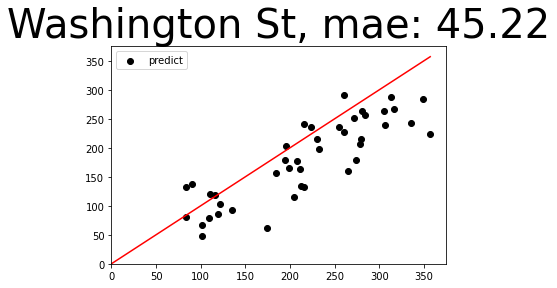

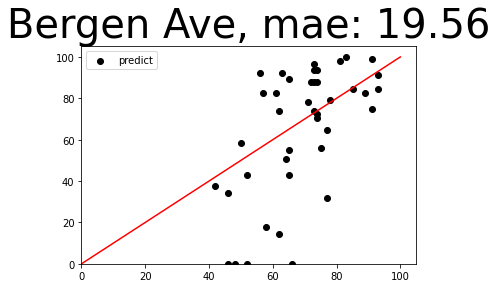

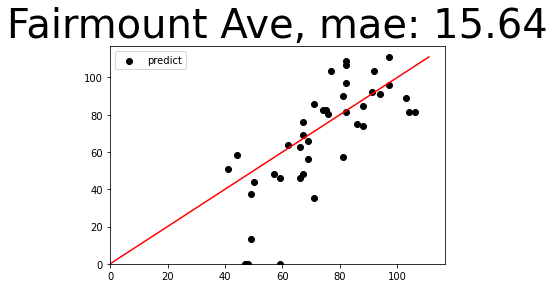

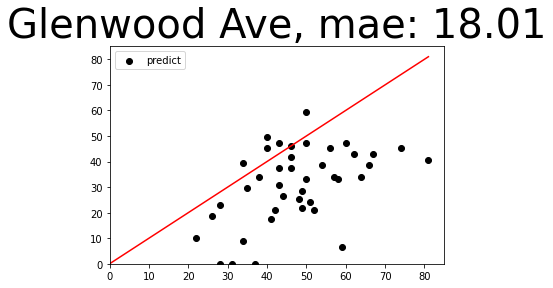

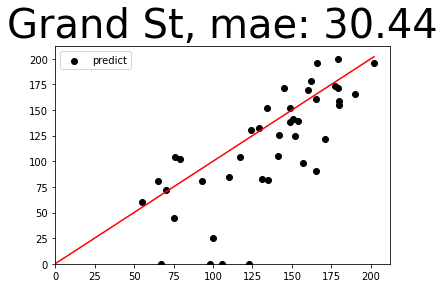

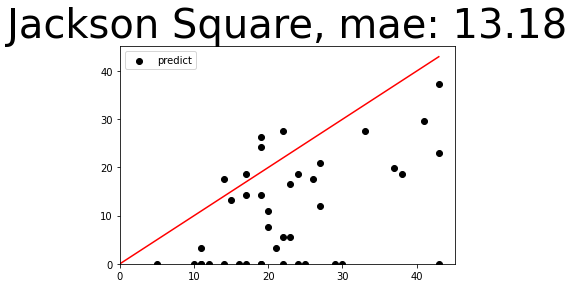

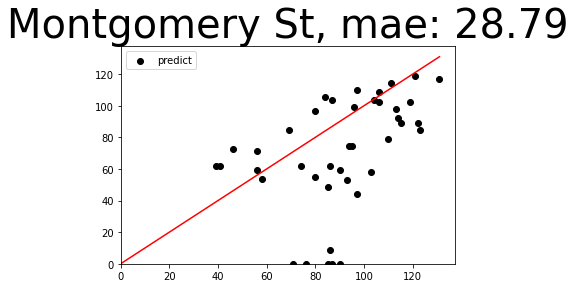

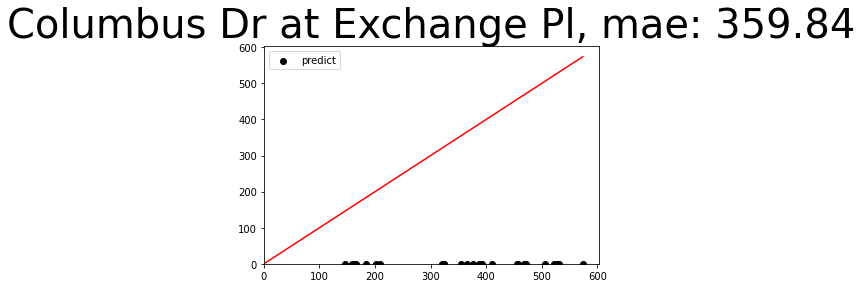

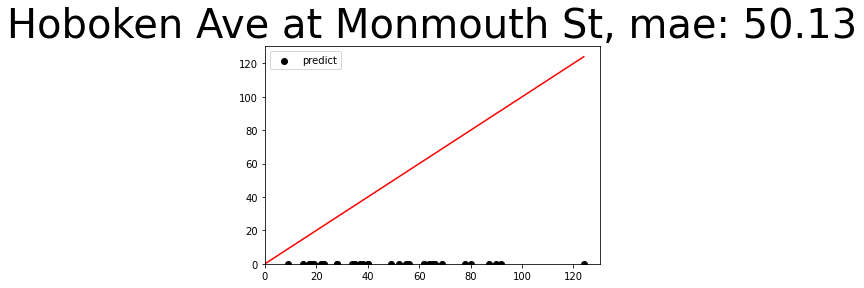

In [22]:
for station in stationnames:
 
    predict_test = gute.iloc[-y_test.shape[0]:]
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = x_test
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    plt.scatter(test2['y'],test2['y2'],label='predict' , color = 'black' )
    #print(test2)
    
    maxdata1 = 0
    maxdata2 = (test2['y'].max())if(test2['y'].max() > test2['y2'].max()) else test2['y2'].max()
    maxdata2 = int( 0 if(np.isnan(maxdata2)) else maxdata2)
    maxdata = (maxdata1)if(maxdata1 > maxdata2) else maxdata2
    maxdata = int(maxdata)
    
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    xline =   np.linspace(0,maxdata,maxdata)
    plt.plot([0,maxdata],[0,maxdata] , color='red')
    plt.ylim(bottom=0)
    plt.xlim(xmin=0)
    plt.legend(loc="upper left")
    plt.savefig( 'GuteImages/'+station+'scatter.jpg',bbox_inches='tight', dpi=150)
    plt.show()